In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import seaborn as sns
from io import StringIO

In [ ]:
# Load the data from the first sheet
# df = pd.read_excel("database2010_2019_Febcorrect3_ALBERT.xlsx", sheet_name='Sheet1')
df = pd.read_excel("database2010_2019_bts.xlsx", sheet_name='Sheet1')


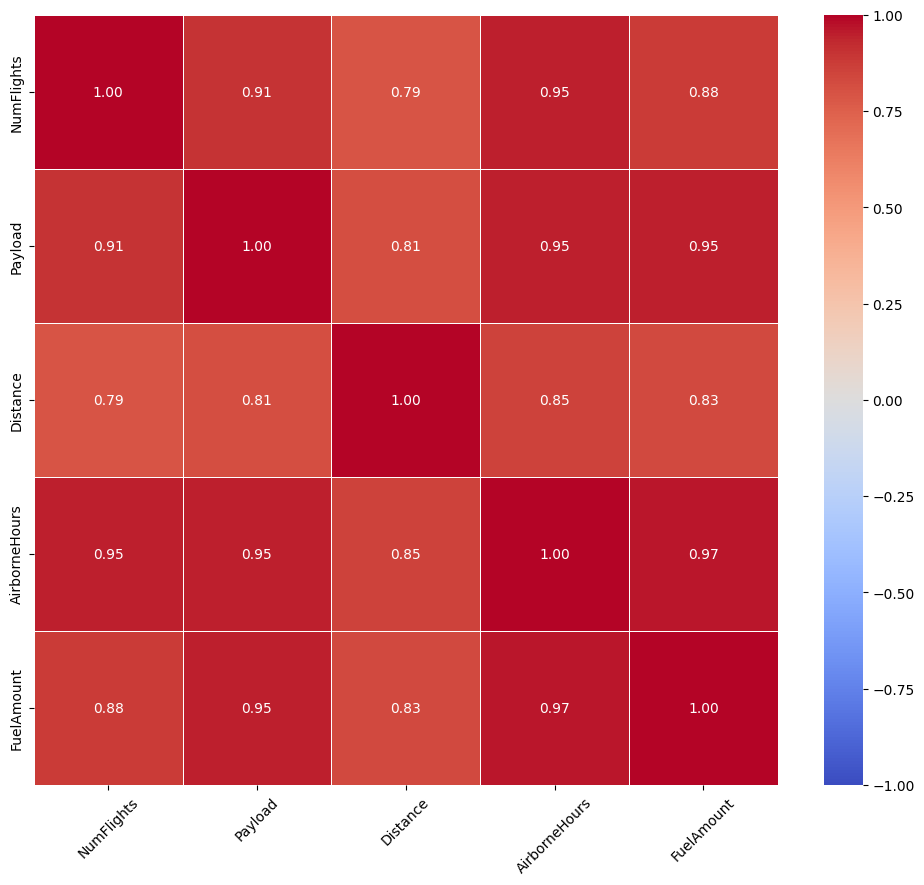

In [5]:
# Calculate the correlation matrix

df_corr = df.rename(columns={
    "DEPARTURES_PERFORMED": "NumFlights",
    "PAYLOAD": "Payload",
    "DISTANCE": "Distance",
    "AIR_TIME": "AirborneHours",
    "AIR_FUELS_ISSUED": "FuelAmount"
})

# Calculate the correlation matrix with the updated column names
corr_matrix = df_corr[["NumFlights", "Payload", "Distance", "AirborneHours", "FuelAmount"]].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.xticks(rotation=45)
# plt.title('Correlation Matrix')
plt.show()

# corr_matrix = df[["DEPARTURES_PERFORMED","PAYLOAD","DISTANCE","AIR_TIME","AIR_FUELS_ISSUED","TOTAL_AIR_HOURS"]].corr()
# # corr_matrix = df.corr()
# # Plot the heatmap of the correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

In [6]:
df_fuel = pd.read_csv("aggregated_data.csv")
df_fuel.head().T

,0,1,2,3,4
airline_id,19393,19393,19393,19393,19393
name,WN,WN,WN,WN,WN
aircraft_type,B737-700,B737-700,B737-700,B737-700,B737-700
time,1,2,3,4,5
ln_fuel,12.277946,12.394476,12.417688,12.394437,12.391647
ln_number_of_flights,12.016352,12.0833,12.089808,12.07692,12.077216
ln_airborne_hours,5.613529,5.710228,5.712907,5.710692,5.715777
ln_distance,14.722445,14.728212,14.728918,14.747481,14.745829
ln_payload,22.526884,22.593832,22.60034,22.587452,22.587748
ln_average_fuel_price,0.717292,0.738457,0.716068,0.821106,0.990071


In [10]:
sns.set(style="whitegrid", font_scale=1.5)

# Set Matplotlib parameters for labels and titles
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16

# Define a color palette
color_palette = ['#93003a', '#00429d', '#93c4d2', '#6ebf7c']

In [14]:
# Adding a column for the actual AIR_FUEL_ISSUED using the exponential of ln_fuel
df_fuel['AIR_FUEL_ISSUED'] = np.exp(df_fuel['ln_fuel'])


In [16]:
df_fuel['YEAR_QUARTER'] = df_fuel['time'].apply(lambda x: f"{2010 + (x - 1) // 4} Q{(x - 1) % 4 + 1}")

df_selected = df_fuel[['YEAR_QUARTER', 'aircraft_type', 'AIR_FUEL_ISSUED']]

# Grouping the data by YEAR_QUARTER and aircraft_type, and summing AIR_FUEL_ISSUED
df_grouped = df_selected.groupby(['YEAR_QUARTER', 'aircraft_type']).sum().reset_index()

# Pivoting the data to have aircraft_type as columns
df_pivot = df_grouped.pivot(index='YEAR_QUARTER', columns='aircraft_type', values='AIR_FUEL_ISSUED')

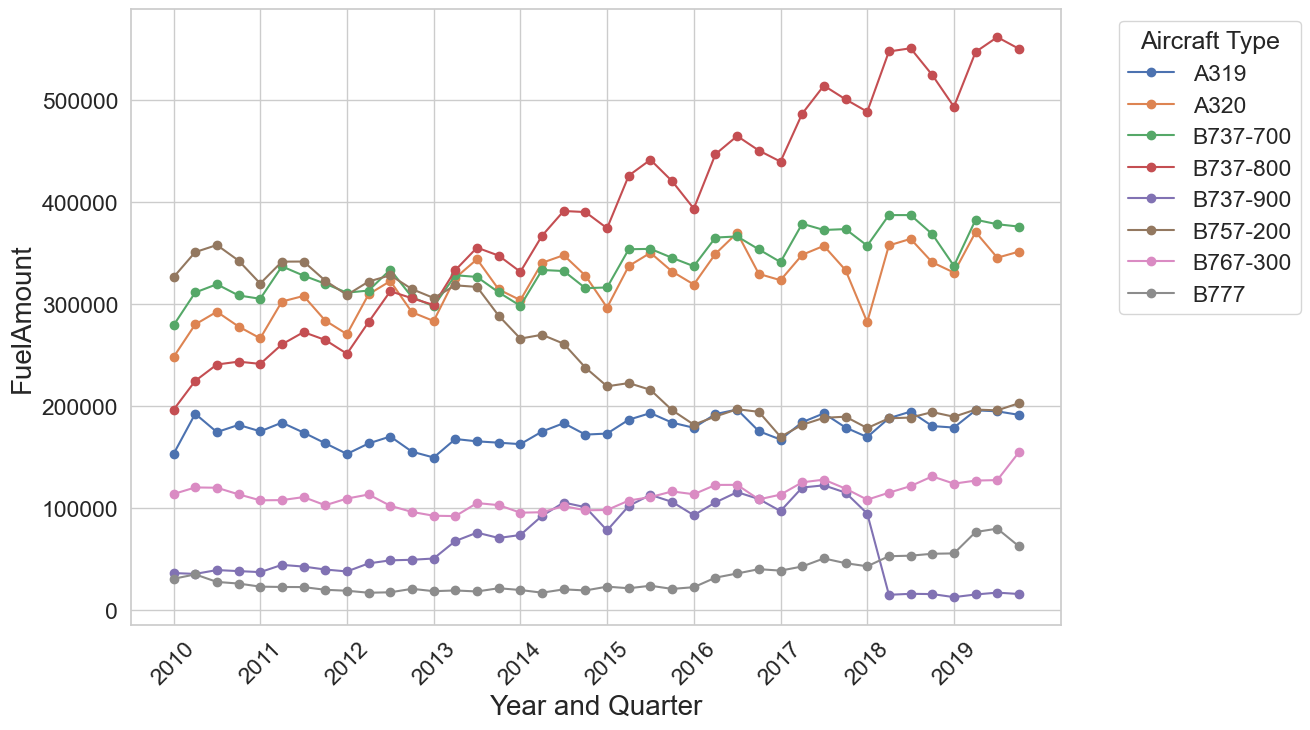

In [25]:
# Adjusting the labels to show 'YEAR' for the first quarter of each year
year_quarters = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
positions = [i*4 for i in range(len(year_quarters))]

# Plotting the data with adjusted labels
fig, ax = plt.subplots(figsize=(12, 8))

df_pivot.plot(marker='o', ax=ax)
# ax.set_title('Air Fuel Issued for Different Aircrafts Over Time')
ax.set_xlabel('Year and Quarter', fontsize=20)
ax.set_ylabel('FuelAmount', fontsize=20)
ax.set_xticks(positions)
ax.set_xticklabels(year_quarters, rotation=45)
ax.legend(title='Aircraft Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.show()

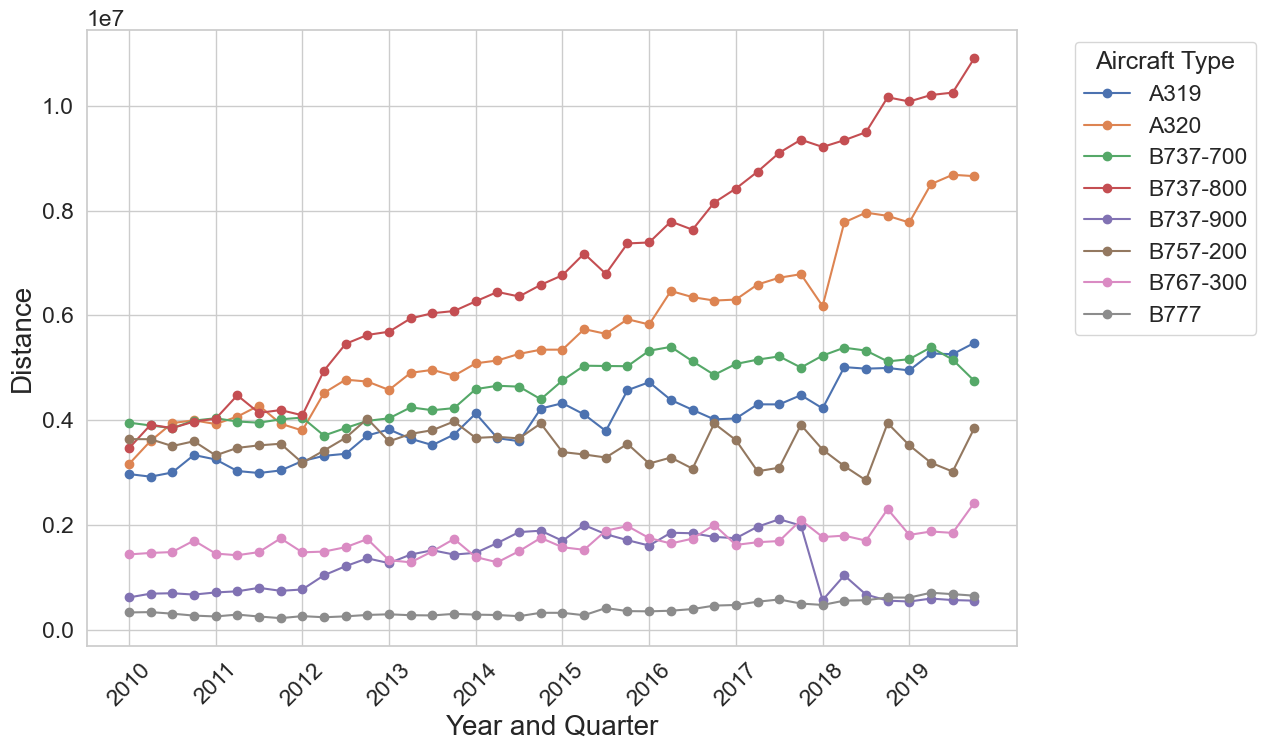

In [26]:
df_fuel['DISTANCE'] = np.exp(df_fuel['ln_distance'])

# Adding a column to represent the year and quarter
df_fuel['YEAR_QUARTER'] = df_fuel['time'].apply(lambda x: f"{2010 + (x - 1) // 4} Q{(x - 1) % 4 + 1}")

# Selecting relevant columns for visualization
df_selected_distance = df_fuel[['YEAR_QUARTER', 'aircraft_type', 'DISTANCE']]

# Grouping the data by YEAR_QUARTER and aircraft_type, and summing DISTANCE
df_grouped_distance = df_selected_distance.groupby(['YEAR_QUARTER', 'aircraft_type']).sum().reset_index()

# Pivoting the data to have aircraft_type as columns
df_pivot_distance = df_grouped_distance.pivot(index='YEAR_QUARTER', columns='aircraft_type', values='DISTANCE')

# Defining the positions and labels for the x-axis
year_quarters = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
positions = [i*4 for i in range(len(year_quarters))]

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

df_pivot_distance.plot(marker='o', ax=ax)
# ax.set_title('Distance for Different Aircrafts Over Time')
ax.set_xlabel('Year and Quarter' , fontsize=20)
ax.set_ylabel('Distance' , fontsize=20)
ax.set_xticks(positions)
ax.set_xticklabels(year_quarters, rotation=45)
ax.legend(title='Aircraft Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.show()

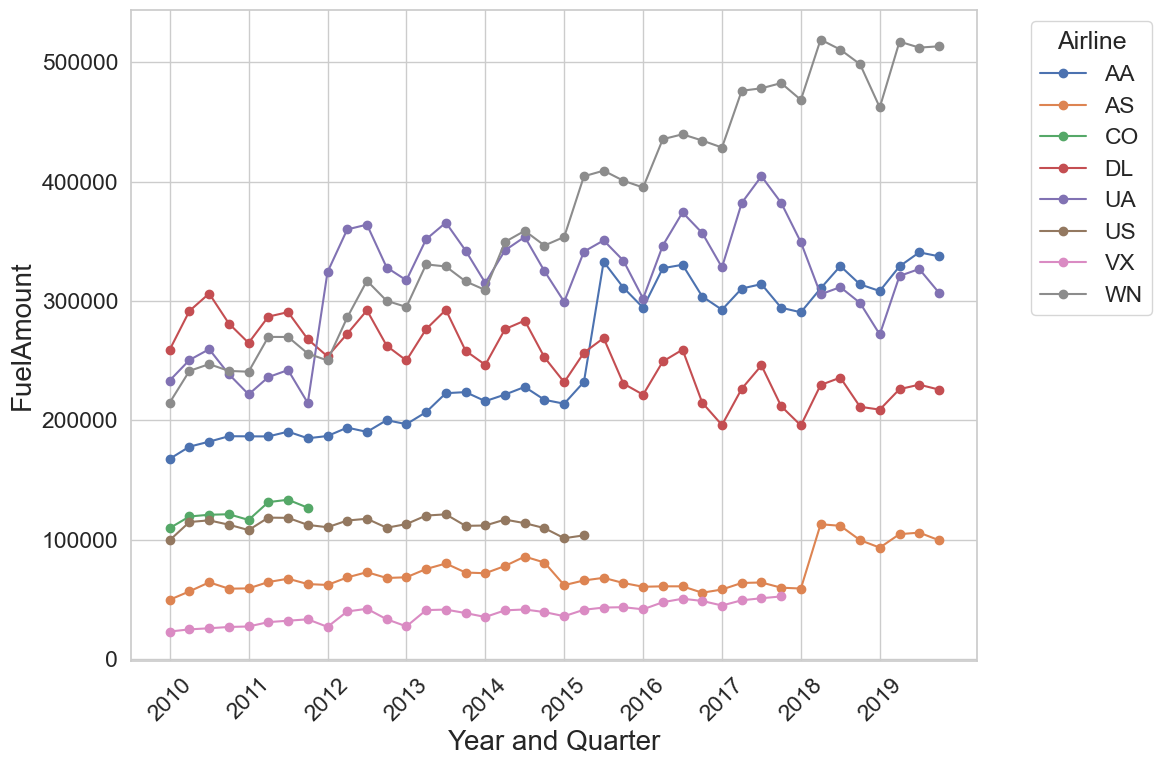

In [27]:
# Assuming df_fuel already exists and 'ln_distance' is in log form
# df_fuel['DISTANCE'] = np.exp(df_fuel['ln_distance'])

# Adding a column to represent the year and quarter
df_fuel['YEAR_QUARTER'] = df_fuel['time'].apply(lambda x: f"{2010 + (x - 1) // 4} Q{(x - 1) % 4 + 1}")

selected_airlines = ['AA', 'US', 'DL', 'UA', 'CO', 'AS', 'VX', 'WN']
df_filtered = df_fuel[df_fuel['name'].isin(selected_airlines)]
# Selecting relevant columns for visualization, modifying to group by 'airline'
df_selected_distance = df_filtered[['YEAR_QUARTER', 'name', 'AIR_FUEL_ISSUED']]



# Grouping the data by YEAR_QUARTER and airline, and summing DISTANCE
df_grouped_distance = df_selected_distance.groupby(['YEAR_QUARTER', 'name']).sum().reset_index()

# Pivoting the data to have airlines as columns
df_pivot_distance = df_grouped_distance.pivot(index='YEAR_QUARTER', columns='name', values='AIR_FUEL_ISSUED')

# Defining the positions and labels for the x-axis
year_quarters = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
positions = [i * 4 for i in range(len(year_quarters))]

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

df_pivot_distance.plot(marker='o', ax=ax)
# ax.set_title('Distance for Different Airlines Over Time')
ax.set_xlabel('Year and Quarter' , fontsize=20)
ax.set_ylabel('FuelAmount', fontsize=20)
ax.set_xticks(positions)
ax.set_xticklabels(year_quarters, rotation=45)
ax.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

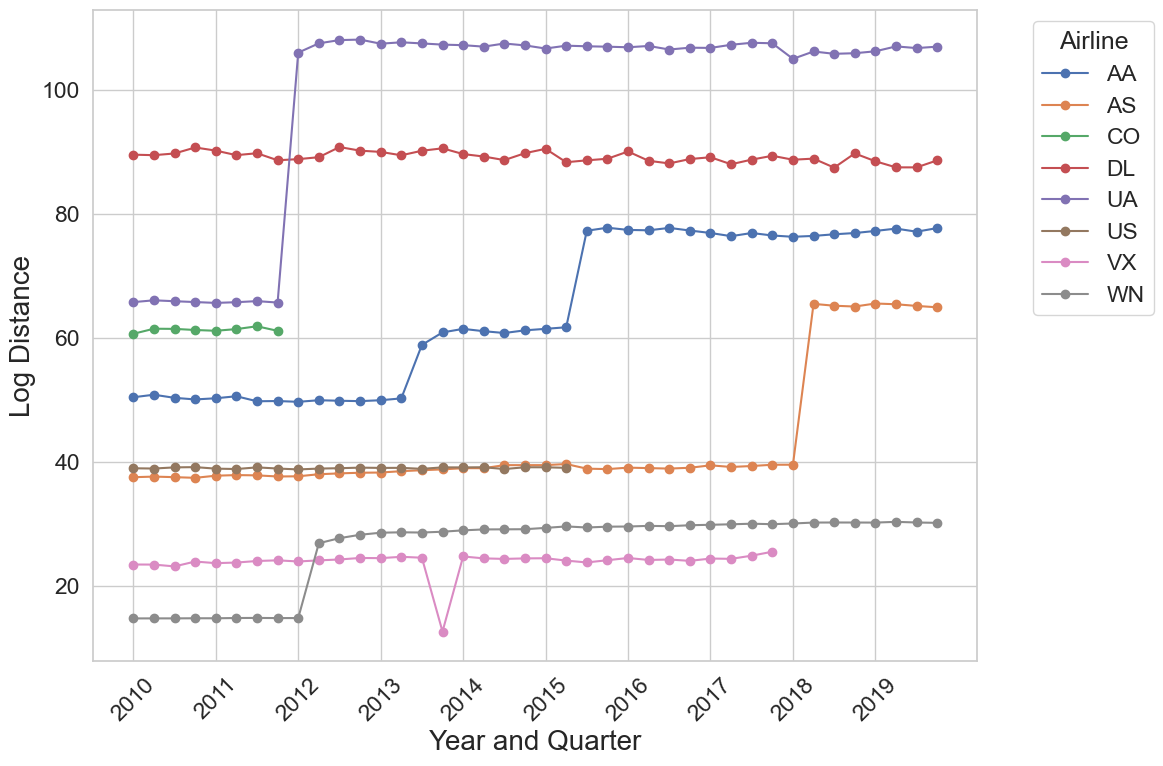

In [28]:
# Assuming df_fuel already exists and 'ln_distance' is in log form
# df_fuel['DISTANCE'] = np.exp(df_fuel['ln_distance'])

# Adding a column to represent the year and quarter
df_fuel['YEAR_QUARTER'] = df_fuel['time'].apply(lambda x: f"{2010 + (x - 1) // 4} Q{(x - 1) % 4 + 1}")

selected_airlines = ['AA', 'US', 'DL', 'UA', 'CO', 'AS', 'VX', 'WN']
df_filtered = df_fuel[df_fuel['name'].isin(selected_airlines)]
# Selecting relevant columns for visualization, modifying to group by 'airline'
df_selected_distance = df_filtered[['YEAR_QUARTER', 'name', 'ln_distance']]



# Grouping the data by YEAR_QUARTER and airline, and summing DISTANCE
df_grouped_distance = df_selected_distance.groupby(['YEAR_QUARTER', 'name']).sum().reset_index()

# Pivoting the data to have airlines as columns
df_pivot_distance = df_grouped_distance.pivot(index='YEAR_QUARTER', columns='name', values='ln_distance')

# Defining the positions and labels for the x-axis
year_quarters = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
positions = [i * 4 for i in range(len(year_quarters))]

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

df_pivot_distance.plot(marker='o', ax=ax)
# ax.set_title('Distance for Different Airlines Over Time')
ax.set_xlabel('Year and Quarter' , fontsize=20)
ax.set_ylabel('Log Distance', fontsize=20)
ax.set_xticks(positions)
ax.set_xticklabels(year_quarters, rotation=45)
ax.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

In [39]:
old_Average_Fuel_Price_df = pd.read_excel("all_flights_fuel.xlsx")
old_Average_Fuel_Price_df.head().T


,0,1,2,3,4
Unnamed: 0,158,197,239,303,522
AIRLINE_ID,19790,19790,19790,19790,19977
YEAR,2010,2010,2010,2010,2010
QUARTER,1,2,3,4,1
AIRCRAFT_TYPE,694,694,694,694,694
DEPARTURES_SCHEDULED,17472,21432,25038,23700,31745
RAMP_TO_RAMP,3152959,3741990,4155768,3717102,4726314
AIR_TIME,2679897,3177191,3489162,3102562,4030489
FUEL_FLY_OPS,97302.0,124089.0,131664.0,122675.0,130054.0
AIR_FUELS_ISSUED,40335.07,49546.48,55846.29,48382.06,62966.1


In [55]:
average_fuel_price_by_time = old_Average_Fuel_Price_df["Average Fuel Price (cents per gallon)"].groupby(old_Average_Fuel_Price_df["time"]).max().reset_index()
average_fuel_price_by_time["old_average_fuel_price"] = average_fuel_price_by_time["Average Fuel Price (cents per gallon)"]/100
adjusted_average_fuel_price_by_time = df_fuel.groupby('time')['ln_average_fuel_price'].max().reset_index()
adjusted_average_fuel_price_by_time['adjusted_average_fuel_price'] = np.exp(adjusted_average_fuel_price_by_time['ln_average_fuel_price'])

,time,ln_average_fuel_price,adjusted_average_fuel_price
0,1,0.717292,2.048877
1,2,0.738457,2.092705
2,3,0.716068,2.046371
3,4,0.821106,2.273012
4,5,0.990071,2.691425
5,6,1.042554,2.836452
6,7,1.007681,2.739242
7,8,0.991318,2.694784
8,9,1.051124,2.860866
9,10,0.973840,2.648093


In [56]:
# match average_fuel_price_by_time and adjusted_average_fuel_price_by_time by time, use the key "time"
average_fuel_price_by_time = pd.merge(average_fuel_price_by_time, adjusted_average_fuel_price_by_time, on='time')
average_fuel_price_by_time.head(40)

,time,Average Fuel Price (cents per gallon),old_average_fuel_price,ln_average_fuel_price,adjusted_average_fuel_price
0,1,204.966667,2.049667,0.717292,2.048877
1,2,212.133333,2.121333,0.738457,2.092705
2,3,207.200000,2.072000,0.716068,2.046371
3,4,234.133333,2.341333,0.821106,2.273012
4,5,286.100000,2.861000,0.990071,2.691425
5,6,313.266667,3.132667,1.042554,2.836452
6,7,302.900000,3.029000,1.007681,2.739242
7,8,296.166667,2.961667,0.991318,2.694784
8,9,318.333333,3.183333,1.051124,2.860866
9,10,295.933333,2.959333,0.973840,2.648093


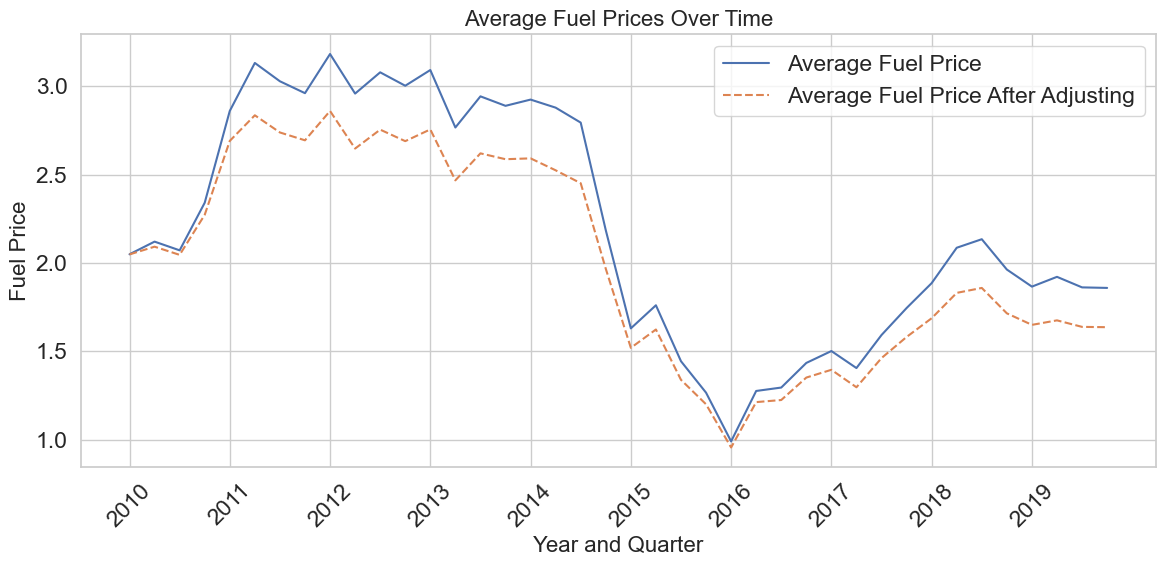

In [57]:
# Updating the labels to only show the year for Q1 of each year
time_to_year_quarter = {i: f'{2010 + (i // 4)} Q{(i % 4) + 1}' for i in range(41)}
filtered_labels = {i: f'{2010 + (i // 4)}' for i in range(40) if (i % 4) == 0}
average_fuel_price_by_time['Year_Quarter'] = average_fuel_price_by_time['time'].map(time_to_year_quarter)

# Plotting the data with updated labels
plt.figure(figsize=(12, 6))
plt.plot(average_fuel_price_by_time['Year_Quarter'], average_fuel_price_by_time['old_average_fuel_price'], label='Average Fuel Price')
plt.plot(average_fuel_price_by_time['Year_Quarter'], average_fuel_price_by_time['adjusted_average_fuel_price'], label='Average Fuel Price After Adjusting', linestyle='--')
plt.xlabel('Year and Quarter', fontsize=16)
plt.ylabel('Fuel Price', fontsize=16)
plt.title('Average Fuel Prices Over Time')

# Applying the updated labels to the x-axis
plt.xticks(ticks=list(filtered_labels.keys()), labels=list(filtered_labels.values()), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()